In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread("tangsan.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

dog=cv2.imread("dog.png")
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

# Display images

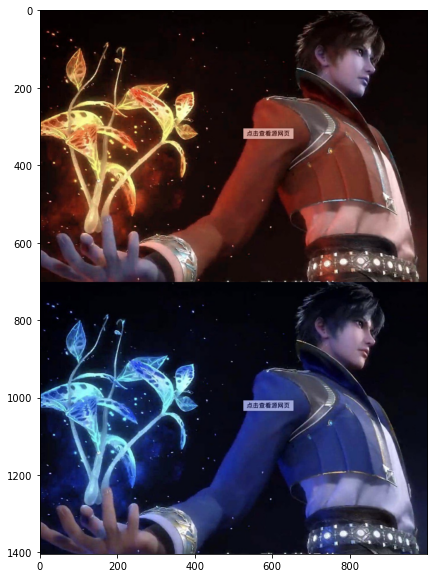

In [32]:
## BGR & RGB
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([img,img_rgb]),cmap='gray') ##cmap is ignored for RGB(A) data.

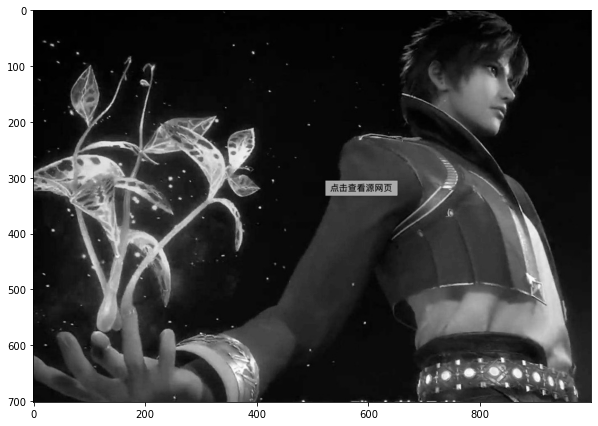

In [33]:
## Gray style
plt.figure(figsize=(10,10))
plt.imshow(img_gray,cmap='gray')

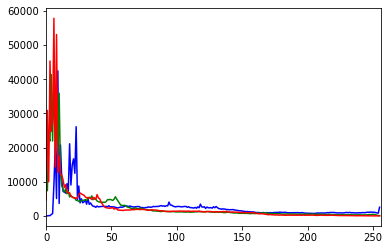

In [26]:
## histogram of RGB channels
img = cv2.imread('tangsan.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

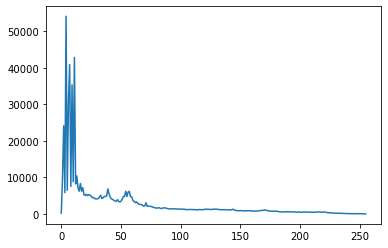

In [33]:
## histogram of RGB channels
histr = cv2.calcHist([cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

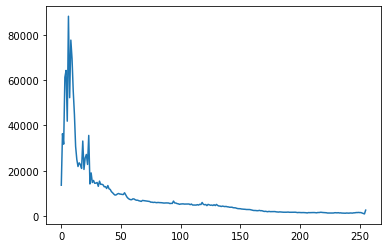

In [27]:
hist = np.zeros(256)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = img[i][j]
         hist[tmp]=hist[tmp]+1    
plt.plot(hist)
plt.show()

# 灰度变换

## 反色变换

(702, 1000)
(702, 1000)
254
1


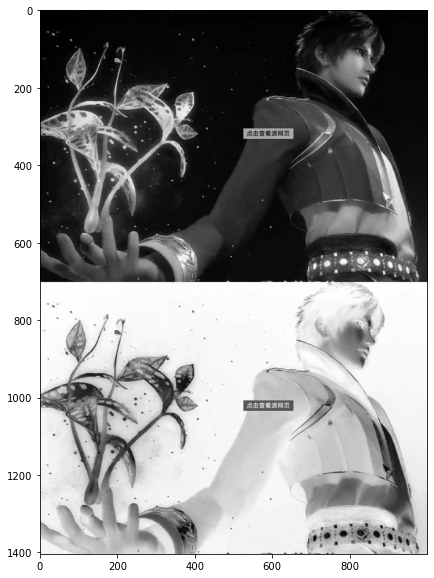

In [39]:
print(img_gray.shape) ## grayscale. One channel.
anti_gray = 255-img_gray  ## inverse color
print(anti_gray.shape)
print(anti_gray[0,0])
print(img_gray[0,0])
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([img_gray,anti_gray]),cmap='gray')

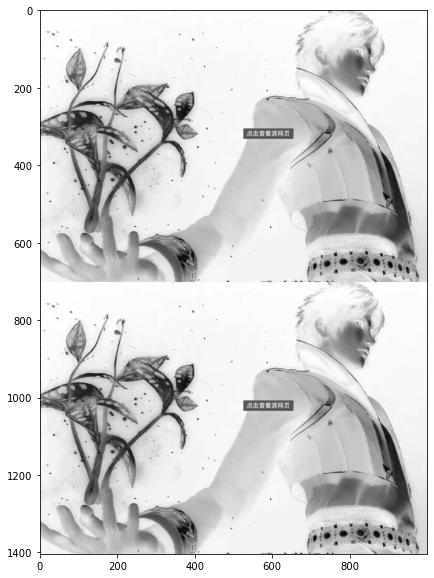

In [42]:
## bitwise_not function of OpenCV
imagem = cv2.bitwise_not(img_gray)
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([imagem,anti_gray]),cmap='gray') ## same result

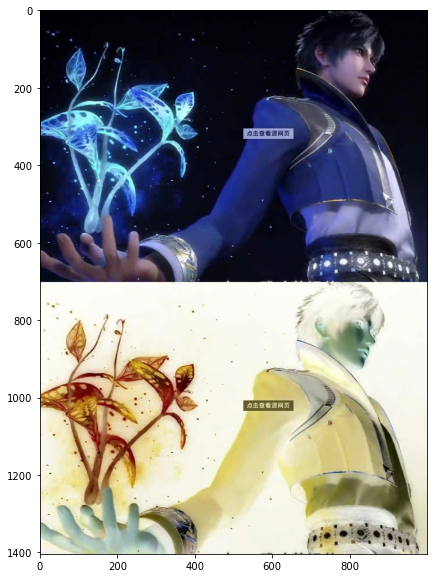

In [44]:
anti_rgb = cv2.bitwise_not(img_rgb)  ## inverse color of rgb
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([img_rgb,anti_rgb]),cmap='gray')

## gamma变换，伽马变换

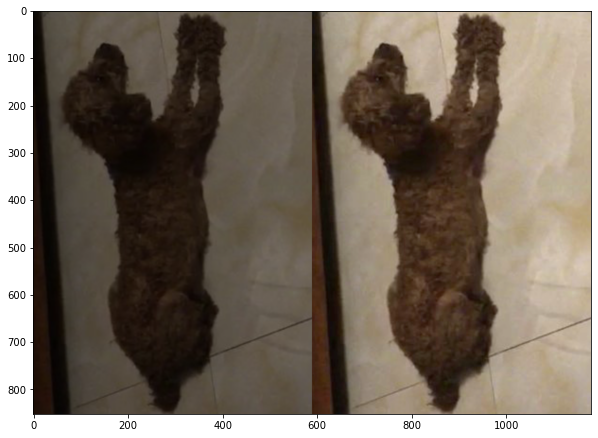

In [65]:
gamma_c=dog.copy()
gamma_c = 3*pow(gamma_c,0.9)

plt.figure(figsize=(10,10))
plt.imshow(cv2.hconcat([dog,gamma_c.astype(np.uint8)]),cmap='gray')

# 直方图与直方图均衡化【面试常考】

## 不同图片的直方图

(852, 590, 3)


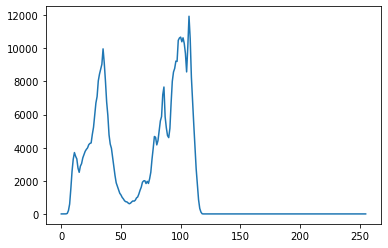

In [71]:
## Histogram of Dog by built-in CV2 function
gamma_c = gamma_c.astype('int8')
print(gamma_c.shape)
hist = cv2.calcHist([dog],[0],None,[256],[0,256])
plt.plot(hist)

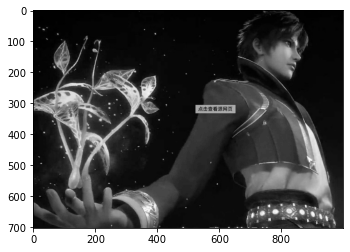

In [83]:
# 灰度直方图-tangsan
import numpy as np
img = cv2.imread("tangsan.jpg",0)
hist = np.zeros(256)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = img[i][j]
         hist[tmp]=hist[tmp]+1      
plt.imshow(img,cmap='gray')   

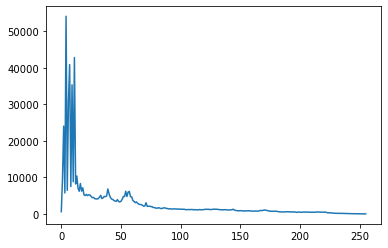

In [84]:
plt.plot(hist)
plt.show()

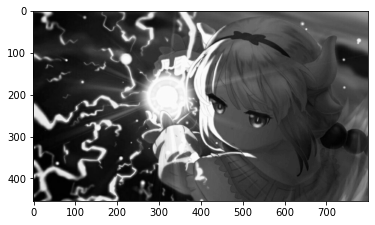

In [103]:
# 直方图2
import numpy as np
hist = np.zeros(256)
img = cv2.imread("hist.png",0)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = img[i][j]
         hist[tmp]=hist[tmp]+1
plt.imshow(img,cmap='gray')        

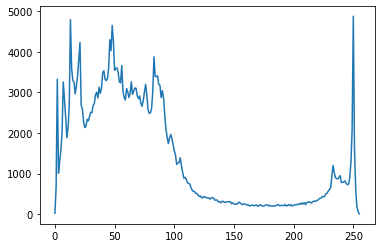

In [104]:
plt.plot(hist)
plt.show()

## 直方图均衡化

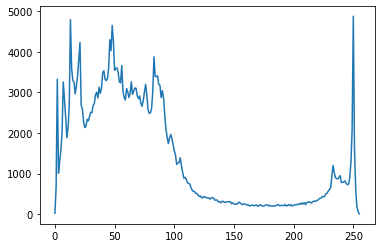

In [105]:
hist = np.zeros(256)
img = cv2.imread("hist.png",0)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
         tmp = img[i][j]
         hist[tmp]=hist[tmp]+1
plt.plot(hist)

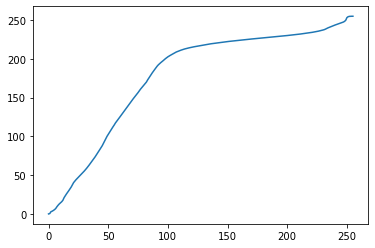

In [106]:
trans = hist/(rows*cols)*255
for i in range(1,len(trans)):
    trans[i]=trans[i-1]+trans[i] ##cdf
plt.plot(trans)

In [107]:
gray_h = img.copy()
for i in range(rows):
    for j in range(cols):
        gray_h[i][j] = int(trans[img[i][j]])

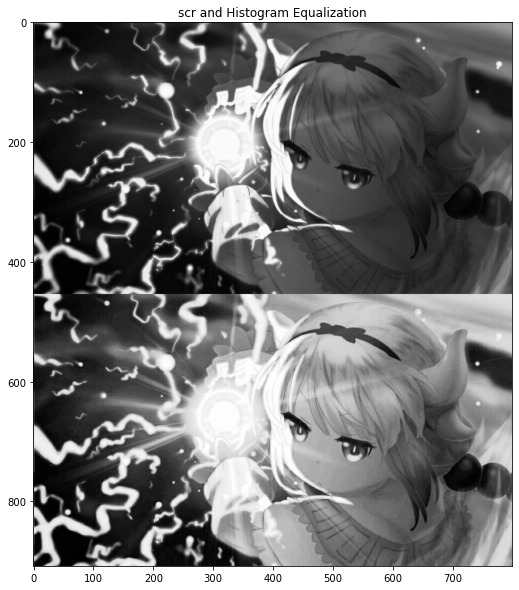

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.vconcat([img,gray_h]),cmap='gray')
plt.title("scr and Histogram Equalization")
plt.show()

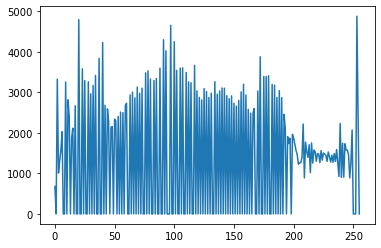

In [111]:
## histgram after equalization
hist = cv2.calcHist([gray_h],[0],None,[256],[0,256])
plt.plot(hist)

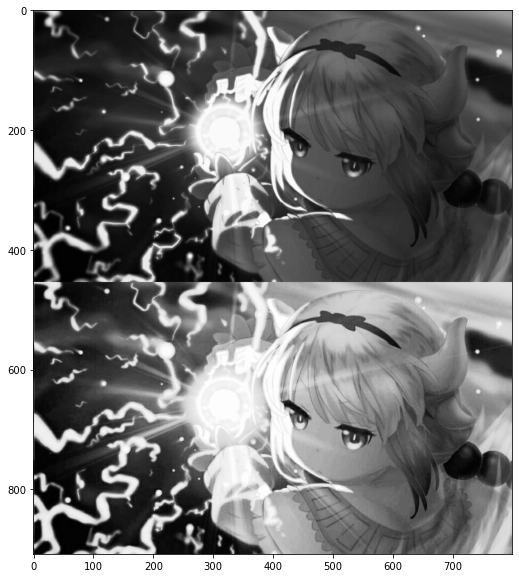

In [121]:
src = cv2.imread("hist.png",0)## read as grayscale
plt.figure(figsize=(10,10))
result = cv2.equalizeHist(src)
plt.imshow(cv2.vconcat([src,result]),cmap='gray')

# Assignment 

In [20]:
import torch

def generate_data():
    # 本函数生成0-9，10个数字的图片矩阵
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    return image_data


def get_mag_angle(img):
    img = np.float64(img)
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)  # Horizontal changes
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)  # Vertical changes
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    return mag, angle

def get_feature(img):
    feature = [0, 0, 0, 0]  ## Initialize features
    mag,angle = get_mag_angle(img)
    angle%=180
    for i , j in enumerate(angle.ravel()):
        if j <= 45:
            feature[0]+= mag.ravel()[i]
        elif j<= 90:
            feature[1]+= mag.ravel()[i]
        elif j<= 135:
            feature[2]+= mag.ravel()[i]
        else: 
            feature[3]+= mag.ravel()[i]
    return feature


## Logistic regression classifier
def model(feature):
    # 下面添加对feature进行决策的代码，判定出feature 属于[0,1,2,3,...9]哪个类别

    return clf.predict(np.reshape(feature,(1, -1)))


In [21]:
import warnings
warnings.simplefilter("ignore")
image_data = generate_data()
X = [get_feature(image_data[i]) for i in range(10)]  ## create X features
y = [i for i in range(10)]  ## create target features
from sklearn.linear_model import LogisticRegression  
clf = LogisticRegression(random_state=0).fit(X, y)

In [22]:
if __name__=="__main__":
    
    image_data = generate_data()
    # 打印出0的图像
    print("数字0对应的图片是:")
    print(image_data[0])
    print("-"*20)
    
    # 打印出8的图像
    print("数字8对应的图片是:")
    print(image_data[8])
    print("-"*20)
    
    #对每张图片进行识别
    print("对每张图片进行识别")
    for i in range(0,10):
        x=image_data[i]
	#对当前图片提取特征
        feature=get_feature(x)
        # 对提取到得特征进行分类
        y = model(feature)
	#打印出分类结果
        print("图像[%s]得分类结果是:[%s],它得特征是[%s]"%(i,y,feature))

数字0对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
数字8对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
对每张图片进行识别
图像[0]得分类结果是:[[0]],它得特征是[[12.242640687119286, 4.0, 0, 4.242640687119286]]
图像[1]得分类结果是:[[1]],它得特征是[[11.414213562373096, 1.0, 0, 2.8284271247461903]]
图像[2]得分类结果是:[[2]],它得特征是[[13.656854249492381, 4.0, 0, 0]]
图像[3]得分类结果是:[[3]],它得特征是[[14.414213562373096, 0, 0, 0]]
图像[4]得分类结果是:[[4]],它得特征是[[6.82842712474619, 7.0, 0, 1.4142135623730951]]
图像[5]得分类结果是:[[5]],它得特征是[[9.414213562373096, 0, 0, 2.8284271247461903]]
图像[6]得分类结果是:[[6]],它得特征是[[12.414213562373096, 2.0, 0, 2.8284271247461903]]
图像[7]得分类结果是:[[7]],它得特征是[[9.414213562373096, 5.0, 0, 0]]
图像[8]得分类结果是:[[8]],它得特征是[[15.414213562373096, 0, 0, 1.414

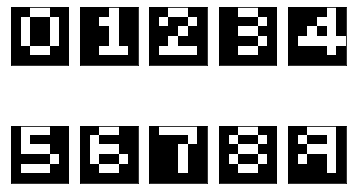

In [26]:
### display grayscale images
for i in range(10):
    plt.subplot(2,5,i+1),plt.imshow(image_data[i],'gray')
    plt.xticks([]),plt.yticks([])

## Cosine-distance classifier

In [27]:
from scipy.spatial import distance
num_features = [get_feature(image_data[i])  for i in range(0,10)] ## store number features
def model(feature):
    # 下面添加对feature进行决策的代码，判定出feature 属于[0,1,2,3,...9]哪个类别
    similarity=[]
    for num_feature in num_features:
        similarity.append(distance.cosine(num_feature, feature))  ## for each number feature, generate cosine distance with input feature.
    return similarity.index(min(similarity))

In [28]:
if __name__=="__main__":
    
    image_data = generate_data()
    # 打印出0的图像
    print("数字0对应的图片是:")
    print(image_data[0])
    print("-"*20)
    
    # 打印出8的图像
    print("数字8对应的图片是:")
    print(image_data[8])
    print("-"*20)
    
    #对每张图片进行识别
    print("对每张图片进行识别")
    for i in range(0,10):
        x=image_data[i]
	#对当前图片提取特征
        feature=get_feature(x)
        # 对提取到得特征进行分类
        y = model(feature)
	#打印出分类结果
        print("图像[%s]得分类结果是:[%s],它得特征是[%s]"%(i,y,feature))

数字0对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
数字8对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
对每张图片进行识别
图像[0]得分类结果是:[0],它得特征是[[12.242640687119286, 4.0, 0, 4.242640687119286]]
图像[1]得分类结果是:[1],它得特征是[[11.414213562373096, 1.0, 0, 2.8284271247461903]]
图像[2]得分类结果是:[2],它得特征是[[13.656854249492381, 4.0, 0, 0]]
图像[3]得分类结果是:[3],它得特征是[[14.414213562373096, 0, 0, 0]]
图像[4]得分类结果是:[4],它得特征是[[6.82842712474619, 7.0, 0, 1.4142135623730951]]
图像[5]得分类结果是:[5],它得特征是[[9.414213562373096, 0, 0, 2.8284271247461903]]
图像[6]得分类结果是:[6],它得特征是[[12.414213562373096, 2.0, 0, 2.8284271247461903]]
图像[7]得分类结果是:[7],它得特征是[[9.414213562373096, 5.0, 0, 0]]
图像[8]得分类结果是:[8],它得特征是[[15.414213562373096, 0, 0, 1.4142135623730951]]
图像

Actual: 9
Prediction:  8


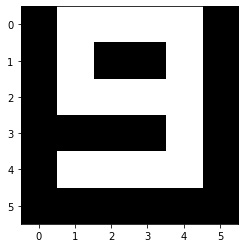

In [44]:
num_9 = torch.tensor(
    [[0,1,1,1,1,0],
    [0,1,0,0,1,0],
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
plt.imshow(num_9,'gray')
print('Actual: 9\nPrediction: ',model(get_feature(num_9)))

Actual: 5
Prediction:  5


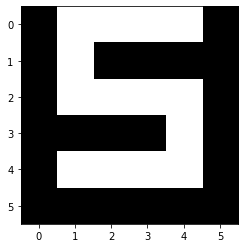

In [46]:
num_5 = torch.tensor(
    [[0,1,1,1,1,0],
    [0,1,0,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
plt.imshow(num_5,'gray')
print('Actual: 5\nPrediction: ',model(get_feature(num_5)))

In [47]:
## wrong classification with new image number 9.